In [23]:
from numpy import *
from scipy.special import binom
from matplotlib.pyplot import *
import mpld3
mpld3.enable_notebook()

In [88]:
def onecase(n,p):
    terms = array([binom(n,j)*p**j*(1-p)**(n-j) for j in range(1,n+1)])
    cumulative = terms.sum()
    return cumulative

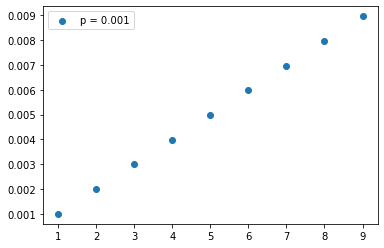

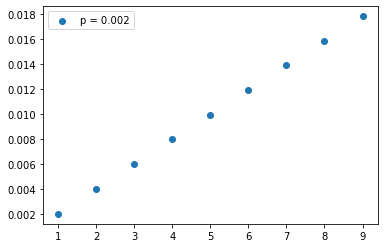

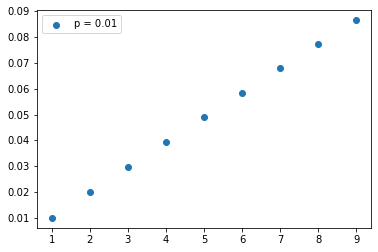

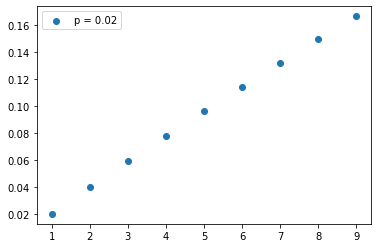

In [89]:
x=arange(1,10)
for p in [0.001,0.002,0.01,0.02]:
    figure()
    y=array([onecase(n,p) for n in x])
    scatter(x,y,label='p = {}'.format(p))
    legend()
    show()

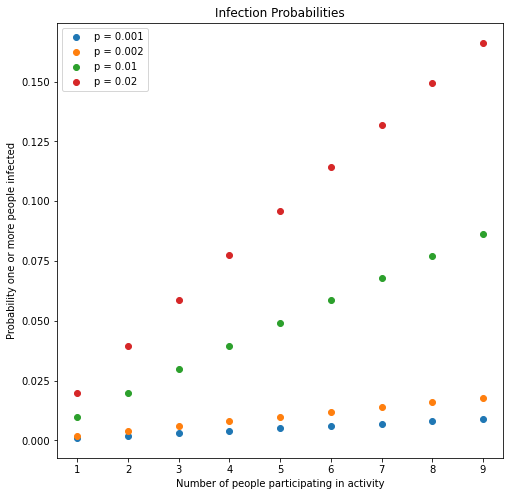

In [91]:
figure(figsize=(8,8))
for p in [0.001,0.002,0.01,0.02]:
    y=array([onecase(n,p) for n in x])
    scatter(x,y,label='p = {}'.format(p))
title("Infection Probabilities")
xlabel("Number of people participating in activity")
ylabel("Probability one or more people infected")
legend()
show()

In [28]:
# Next: figure out number of weeks until threshold(s) crossed
def psick_weeks(W,p,n):
    # Compute the probability that at least one person gets
    # infected in a week
    p1week = onecase(n,p)
    # return the probability someone's gotten sick after W weeks
    p_notsick = (1-p1week)**W
    psick = 1-p_notsick
    return psick

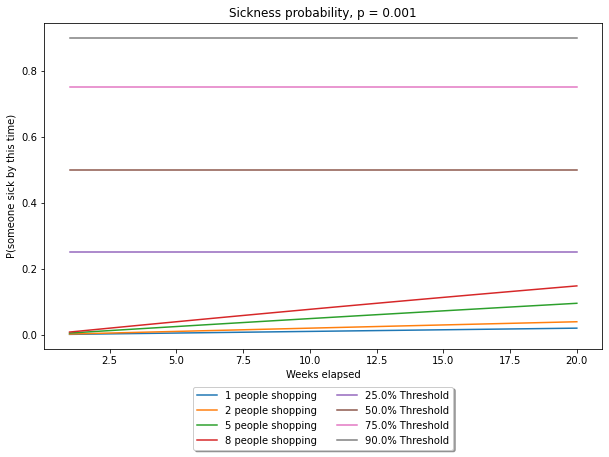

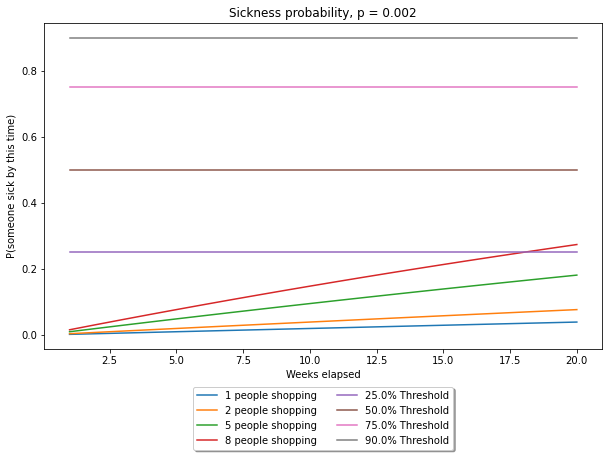

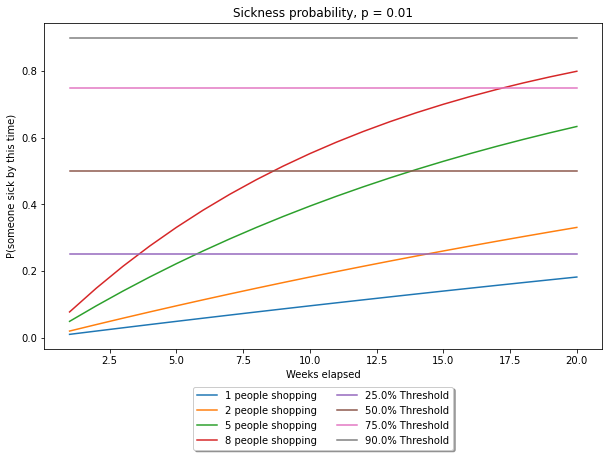

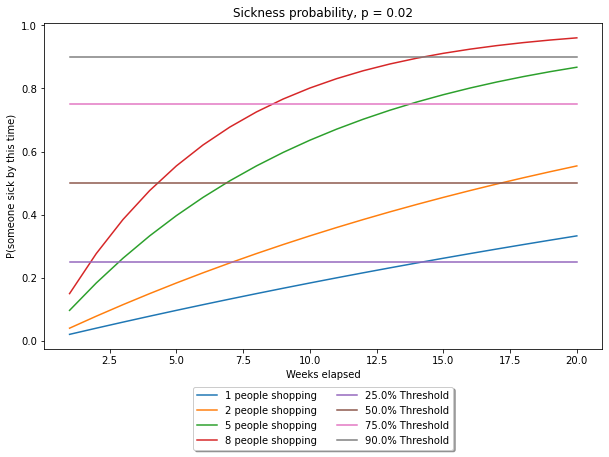

In [58]:
mpld3.disable_notebook()
W = arange(1,21)
for p in [0.001,0.002,0.01,0.02]:
    figure(figsize = (10,6))
    for n in [1,2,5,8]:
        psick = array([psick_weeks(w,p,n) for w in W])
        plot(W,psick,label='{} people shopping'.format(n))
    for t in [0.25,0.5,0.75,0.9]:
        plot([1,max(W)],[t,t],label='{}% Threshold'.format(t*100))
    title("Sickness probability, p = {}".format(p))
    #xlim((0,1.5*max(W)))
    xlabel('Weeks elapsed')
    ylabel('P(someone sick by this time)')
    legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
    show()

In [ ]:
# So things depend on the individual probability strongly enough
# that it could be an issue
# In other words, if p exceeds 0.002, there's a greater than 1 in 4
# chance that someone in this house will have gotten COVID from grocery 
# shopping by the time we have a vaccine in April if 8 people are 
# shopping
# If p exceeds 0.01, that number goes up to 3 in 4 

In [79]:
# Next: how do these charts change if the percentage of the population 
# infected increases by some factor K?
K = 6 # This is approximately the change in new daily cases reported between
      # 10/1 and 12/1 (7-day average, per Google statistics; approx.
      # average of the ratio of new cases on 12/1 to those on 10/1
      # for Santa Clara County (8) and San Mateo County(4))
p = array([0.001,0.002,0.01,0.02])
x = log(1-p)
xnew = K*x
pnew = 1-exp(xnew)
print(pnew)

[0.00598502 0.01194016 0.05851985 0.11415762]


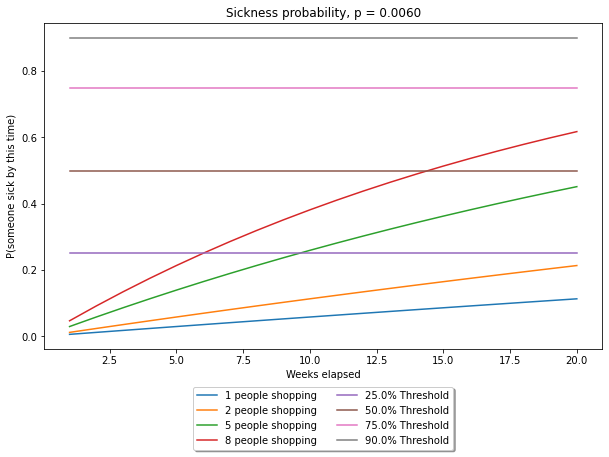

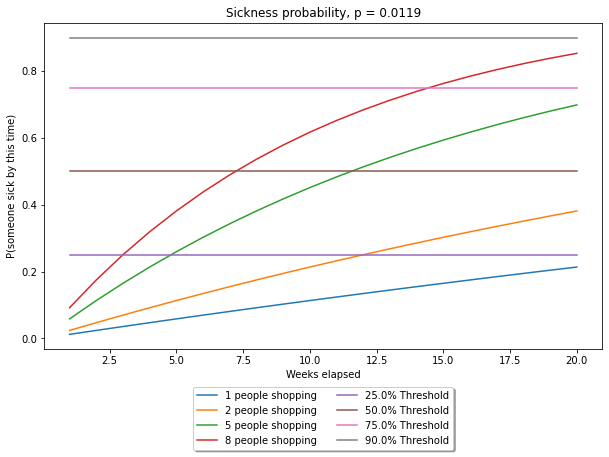

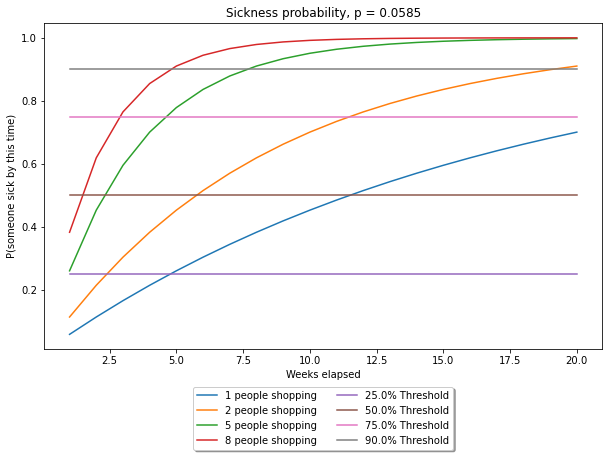

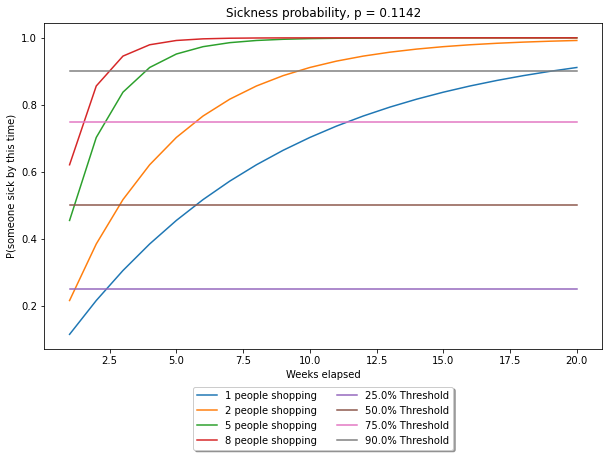

In [85]:
mpld3.disable_notebook()
W = arange(1,21)
for p in pnew:
    figure(figsize = (10,6))
    for n in [1,2,5,8]:
        psick = array([psick_weeks(w,p,n) for w in W])
        plot(W,psick,label='{} people shopping'.format(n))
    for t in [0.25,0.5,0.75,0.9]:
        plot([1,max(W)],[t,t],label='{}% Threshold'.format(t*100))
    title("Sickness probability, p = {:0.4f}".format(p))
    #xlim((0,1.5*max(W)))
    xlabel('Weeks elapsed')
    ylabel('P(someone sick by this time)')
    legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
    show()

In [81]:
# From this: if probability of getting infected in a visit to TJ's was 1 in 1000
# on October 1, there is now a probability of over 60% that someone in the house
# will have gotten COVID by April if 8 people in the house shop once a week 
# between now and then